# Plotting & visualising
<br>
<br>
<br>

In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt #from matplotlib import pyplot as plt
import tikzplotlib as tikz


#set settings so we can see every row and column
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
import pandas as pd
#change my own working directory for importing the files
import os
os.getcwd()
os.chdir('/Users/michellemak/Google Drive/Tilburg University/Master/Master Thesis/Code/Data/Raw data/')
os.getcwd()

#set settings so we can see every row and column
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#read the dataset and show the first few columns
waves = pd.read_csv("waves_cleaned3003.csv", low_memory=False)


In [4]:
waves.head()

,Geslacht,Leeftijd,Woonplaats,Covid_result,Huishouden,ThuiswonendeKinderen_0-3,ThuiswonendeKinderen_4-12,ThuiswonendeKinderen_13-17,ThuiswonendeKinderen_18+,HoogsteOpleiding,CruciaalBeroep,DirectContact,DirectContactMetCovid,NormaleWeek_Thuiswerken,NormaleWeek_Buitenshuiswerken,Normaleweek_Nietwerken,CoronaWeek_Thuiswerken,CoronaWeek_Buitenshuiswerk,CoronaWeek_Nietwerken,HoeveelPersonenContact,Klacht_Neusverkoudheid,Klacht_Keelpijn,Klacht_DrogeHoest,Klacht_Vermoedheid,Klacht_SlijmHoest,Klacht_SpierGewrichtspijn,Klacht_Hoofdpijn,Klacht_Koorts,Klacht_Kortademig,Klacht_Diarree,Klacht_Misselijkheid,Klacht_Overgeven,Klacht_Rillingen,Klacht_Niezen,Klacht_Huiduitslag,Klacht_Verward,Klacht_VerslapteSpieren,Klacht_GeenReukSmaak,RIVM_HandenWassen,RIVM_GrondigHandenWassen,RIVM_GeenHandenSchudden,RIVM_PapierZakdoek,RIVM_Elleboog,RIVM_ThuisblijvenSymptomen,RIVM_Thuiswerken,RIVM_1.5mAfstand,RIVM_VermijdenGroepen,Extra_Niets,Extra_OpenbaarVermijden,Extra_WinkelsVermijden,Extra_Schoonmaak,Extra_DesinfectieGebruik,Extra_DesinfectieGelDragen,Extra_Gezichtsmasker,Extra_Supplementen,Extra_ContactMinimaliseren,Extra_GezondEten
0,0,46.0,1,1,4.0,0.0,0.0,2.0,1.0,5.0,1.0,2.0,2.0,1.0,4.0,2.0,5.0,0.0,2.0,0.0,1.0,1.0,5.0,5.0,3.0,3.0,2.0,5.0,4.0,1.0,1.0,1.0,5.0,2.0,1.0,1.0,2.0,5.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,35.0,467,1,4.0,0.0,2.0,0.0,0.0,4.0,5.0,2.0,2.0,0.0,5.0,2.0,0.0,5.0,2.0,30.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,4.0,4.0,6.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,65.0,1104,1,3.0,0.0,0.0,0.0,0.0,5.0,1.0,2.0,2.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,3.0,3.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,53.0,489,1,4.0,0.0,0.0,0.0,2.0,4.0,1.0,2.0,2.0,0.0,5.0,2.0,0.0,5.0,2.0,10.0,4.0,2.0,1.0,2.0,1.0,2.0,1.0,3.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,4.0,4.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,57.0,1244,1,3.0,0.0,0.0,0.0,0.0,4.0,4.0,2.0,2.0,0.0,5.0,2.0,0.0,5.0,2.0,20.0,1.0,4.0,4.0,4.0,1.0,1.0,4.0,4.0,1.0,1.0,1.0,1.0,4.0,1.0,4.0,1.0,1.0,4.0,2.0,2.0,1.0,2.0,2.0,1.0,6.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0


## Household situation

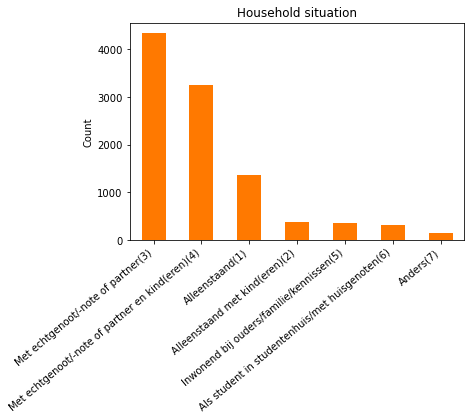

In [49]:
household = waves['Huishouden'].value_counts(sort=True).plot(kind='bar', color=('#ff7900'))
values = ['Met echtgenoot/-note of partner(3)','Met echtgenoot/-note of partner en kind(eren)(4)', 'Alleenstaand(1)', 'Alleenstaand met kind(eren)(2)',
          'Inwonend bij ouders/familie/kennissen(5)','Als student in studentenhuis/met huisgenoten(6)','Anders(7)']
#plt.xlabel('Household situation')
plt.ylabel('Count')
plt.title('Household situation')

#vage omweg om de x tick labels te veranderen
ax = plt.gca()
ax.set_xticklabels(values, rotation=40,horizontalalignment='right')

plt.savefig('Household situation.png', bbox_inches='tight', dpi=150)

## Household situation vs covid result

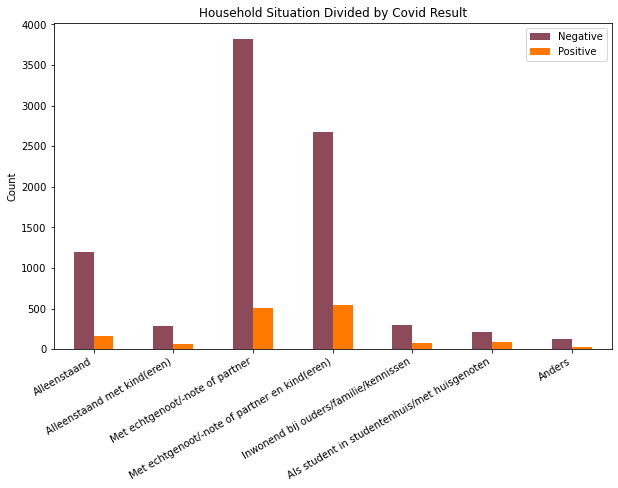

In [7]:
%matplotlib inline
#household = waves['Huishouden'].value_counts(sort=True).plot(kind='bar', color=('#ff7900'))
#values = ['Met echtgenoot/-note of partner(3)','Met echtgenoot/-note of partner en kind(eren)(4)', 'Alleenstaand(1)', 'Alleenstaand met kind(eren)(2)',
         # 'Inwonend bij ouders/familie/kennissen(5)','Als student in studentenhuis/met huisgenoten(6)','Anders(7)']

#vage omweg om de x tick labels te veranderen
#ax = plt.gca()
#ax.set_xticklabels(values, rotation=90)


household_result = pd.crosstab(waves['Huishouden'], waves['Covid_result']).plot(kind='bar', color=('#8c4a5b','#ff7900'), figsize=(10,6))
values = ['Alleenstaand','Alleenstaand met kind(eren)','Met echtgenoot/-note of partner','Met echtgenoot/-note of partner en kind(eren)','Inwonend bij ouders/familie/kennissen','Als student in studentenhuis/met huisgenoten','Anders']
ax = plt.gca()
ax.set_xticklabels(values, rotation=30, horizontalalignment='right')

plt.xlabel('')
plt.ylabel('Count')
plt.title('Household Situation Divided by Covid Result')
plt.legend(['Negative','Positive'])


tikz.save("Household situation divided by covid result.tex")

#plt.savefig('Household situation divided by covid result.png', bbox_inches='tight', dpi=150)



## Highest education

In [6]:
waves['HoogsteOpleiding'].value_counts()

5.000000    3593
4.000000    3189
6.000000    1842
3.000000    1435
2.000000      72
1.000000      21
4.555063      14
Name: HoogsteOpleiding, dtype: int64

In [7]:
waves[(waves.HoogsteOpleiding == 1.0) & (waves.HoogsteOpleiding == 2)]

,KeyID,Geslacht,Leeftijd,Woonplaats,Invuldatum,Donatiedatum,OD.CO,Covid_result,Huishouden,ThuiswonendeKinderen_0-3,ThuiswonendeKinderen_4-12,ThuiswonendeKinderen_13-17,ThuiswonendeKinderen_18+,HoogsteOpleiding,CruciaalBeroep,DirectContact,DirectContactMetCovid,CoronaWeek_Thuiswerken,CoronaWeek_Buitenshuiswerk,CoronaWeek_Nietwerken,HoeveelPersonenContact,Klacht_Neusverkoudheid,Klacht_Keelpijn,Klacht_DrogeHoest,Klacht_Vermoedheid,Klacht_SlijmHoest,Klacht_SpierGewrichtspijn,Klacht_Hoofdpijn,Klacht_Koorts,Klacht_Kortademig,Klacht_Diarree,Klacht_Misselijkheid,Klacht_Overgeven,Klacht_Rillingen,Klacht_Niezen,Klacht_Huiduitslag,Klacht_Verward,Klacht_VerslapteSpieren,Klacht_GeenReukSmaak,RIVM_HandenWassen,RIVM_GrondigHandenWassen,RIVM_GeenHandenSchudden,RIVM_PapierZakdoek,RIVM_Elleboog,RIVM_ThuisblijvenSymptomen,RIVM_Thuiswerken,RIVM_1.5mAfstand,RIVM_VermijdenGroepen,Extra_Niets,Extra_OpenbaarVermijden,Extra_WinkelsVermijden,Extra_Schoonmaak,Extra_DesinfectieGebruik,Extra_DesinfectieGelDragen,Extra_Gezichtsmasker,Extra_Supplementen,Extra_ContactMinimaliseren,Extra_GezondEten


In [8]:
waves.drop(waves.loc[waves['HoogsteOpleiding']=='4.555063'].index, inplace=True)

/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [28]:
waves['Geslacht'].value_counts()

0    5268
1    4884
Name: Geslacht, dtype: int64

Text(0.5, 1.0, 'Highest education')

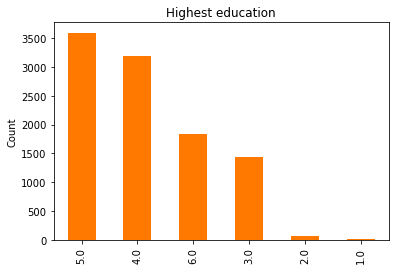

In [8]:
waves['HoogsteOpleiding'].value_counts().plot(kind='bar', color=('#ff7900'))
#values = ['Geen', 'Lagere school (basisonderwijs)','Middelbare school','Beroepsopleiding(MBO)','HBO','Universiteit']

#vage omweg om de x tick labels te veranderen
#ax = plt.gca()
#ax.set_xticklabels(values, rotation=90)

#labels
plt.ylabel('Count')
plt.title('Highest education')

## Gender distribution

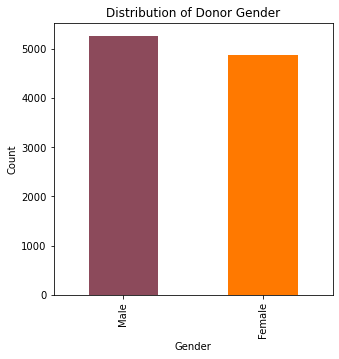

In [38]:
gender = waves['Geslacht'].value_counts().plot(kind='bar', figsize=(5,5), color=('#8c4a5b','#ff7900'))
#gender.plot(kind='bar', figsize=(5,5))
#plt.legend(['Male','Female'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Donor Gender')
#plt.legend(['Male','Female'])
locs, labels=plt.xticks()
labels = ['Male', 'Female']
plt.xticks(locs, labels = labels, rotation = 'vertical')

plt.savefig('Distribution of Donor Gender.png', bbox_inches='tight', dpi=150)

#labels = ['high', 'low', 37337]
#plt.plot(x,y, 'r')
#plt.xticks(x, labels, rotation='vertical')
#plt.show()

## Covid Result, grouped by gender

In [10]:
!pip install tikzplotlib --user

     |████████████████████████████████| 53 kB 2.6 MB/s eta 0:00:011


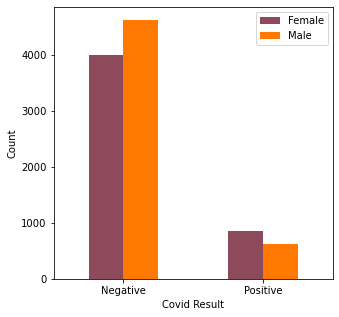

In [5]:
result_gender = pd.crosstab(waves['Covid_result'], waves['Geslacht']).plot(kind='bar', figsize=(5,5), color=('#8c4a5b','#ff7900'))

plt.xlabel('Covid Result')
plt.ylabel('Count')
#plt.title('Distribution of Covid Result, grouped by gender')
plt.legend(['Female','Male'])
locs, labels=plt.xticks()
labels = ['Negative', 'Positive']
plt.xticks(locs, labels = labels, rotation = 'horizontal')

tikz.save("Gender distribution divided by covid result.tex")
plt.savefig('Gender distribution divided by covid result', bbox_inches='tight', dpi=150)

In [25]:
waves['Geslacht'].value_counts()
#1 = male

1    5253
0    4864
Name: Geslacht, dtype: int64

In [28]:
5253+4864

10117

In [29]:
5235/10117*100

51.744588316694674

In [30]:
4864/10117*100

48.07749332806168

In [26]:
waves.groupby('Covid_result')['Geslacht'].value_counts()

Covid_result  Geslacht
0             1           4626
              0           4005
1             0            859
              1            627
Name: Geslacht, dtype: int64

## Covid Result

In [15]:
(8672/(8672+1494))*100

85.30395435766279

In [16]:
(1494/(8672+1494))*100

14.696045642337202

In [19]:
(8672+1494)/1494

6.804551539491299

In [12]:
waves['Covid_result'].value_counts()

neg    8672
pos    1494
Name: Covid_result, dtype: int64

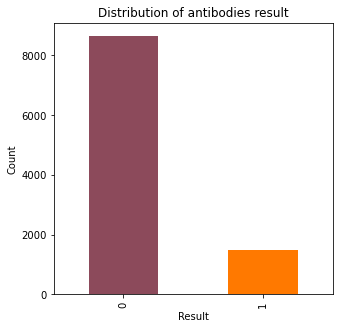

In [51]:
gender = waves['Covid_result'].value_counts().plot(kind='bar', figsize=(5,5), color=('#8c4a5b','#ff7900'))
#gender.plot(kind='bar', figsize=(5,5))
#plt.legend(['Male','Female'])
plt.xlabel('Result')
plt.ylabel('Count')
plt.title('Distribution of antibodies result')
plt.savefig('distribution_antibodies.png')

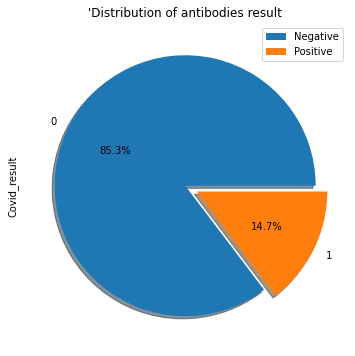

In [54]:
waves["Covid_result"].value_counts().plot(kind = 'pie',explode=[0, 0.1],figsize=(6, 6),autopct='%1.1f%%',shadow=True)
plt.title("'Distribution of antibodies result",)
plt.legend(["Negative", "Positive"])
plt.show()

## Age distribution

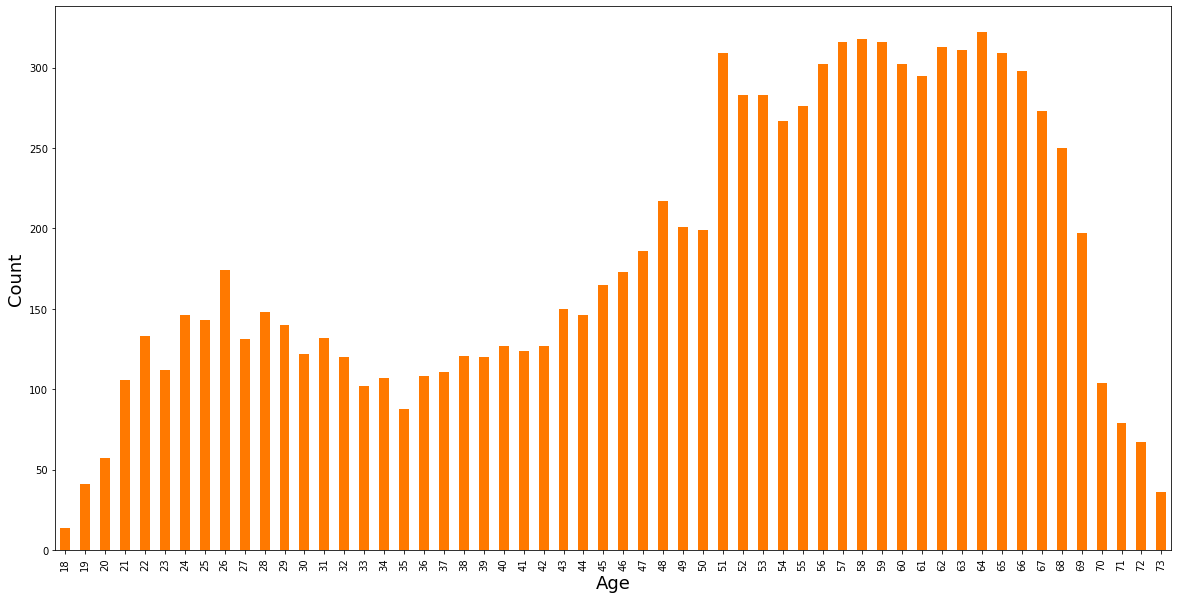

In [19]:
#change the type to integer so it shows only integer numbers on the axis
waves['Leeftijd'] = waves['Leeftijd'].astype(np.int64)

#plot
waves['Leeftijd'].value_counts().sort_index(ascending=True).plot(kind='bar', figsize=(20,10), color='#ff7900')

plt.xlabel('Age', fontsize=18)
plt.ylabel('Count', fontsize=18)
#plt.title('Distribution of donor age')

tikz.save("Age distribution donors.tex", axis_height='11cm', axis_width= '21cm')


#plt.savefig('Age distribution.png')

In [31]:
waves['Leeftijd'].describe()

count    10117.000000
mean        50.082831
std         14.154805
min         18.000000
25%         40.000000
50%         53.000000
75%         62.000000
max         73.000000
Name: Leeftijd, dtype: float64

In [ ]:
# Example for thesis PR curve
import scipy
from scipy.interpolate import BSpline, make_interp_spline


x = np.array([0, .25, .50, .70, .80, 1])
y = np.array([1, .9, .88, .83, .80, 0])

x_neww = np.linspace(0,1,300)
a_BSplinee = scipy.interpolate.make_interp_spline(x,y)
y_neww = a_BSplinee(x_neww)

plt.figure(figsize=(8,8))
plt.plot(x_neww,y_neww)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')

x_cor = [0,1]
y_cor = [0.15,0.15]

plt.plot(x_cor,y_cor, linestyle='--', label='Baseline=0.15')

plt.savefig('Precision Recall Curve Example.png', bbox_inches='tight', dpi=150)


plt.show()

## Donation date

Text(0.5, 1.0, 'Distribution of donation date')

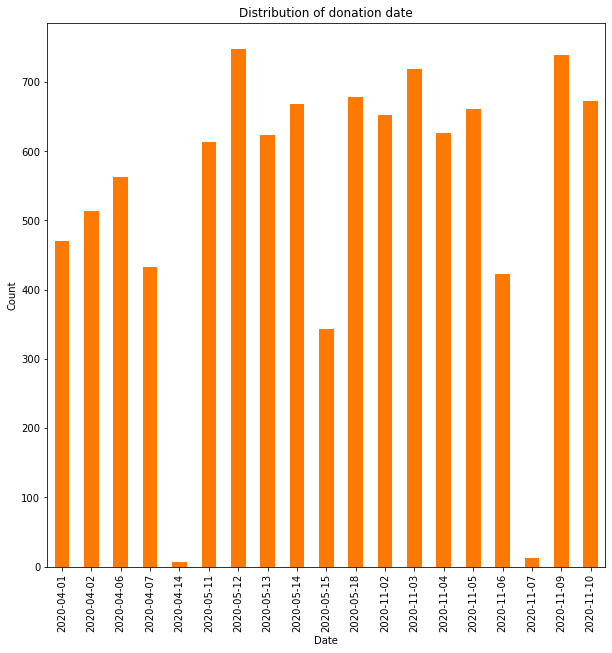

In [35]:
#plot
waves['Donatiedatum'].value_counts().sort_index(ascending=True).plot(kind='bar', figsize=(10,10), color='#ff7900')

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Distribution of donation date')

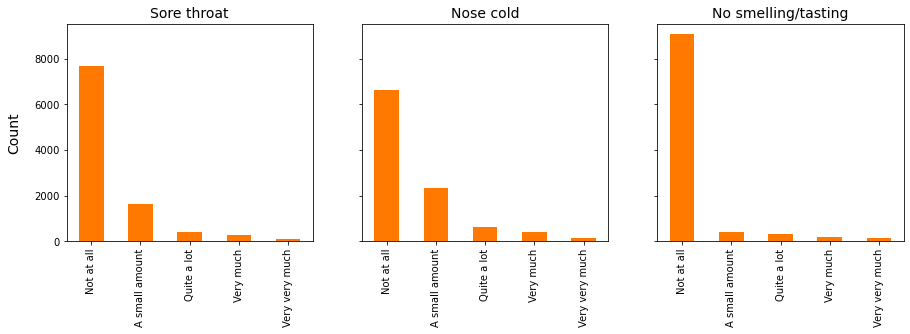

In [90]:
fig, (ax1, ax2, ax3) = plt.subplots (1,3, figsize=(15,4), sharey=True, sharex=True,)
fig.text(0.07, 0.5, 'Count', va='center', rotation='vertical', fontsize=14)


#keelpijn
pd.value_counts(waves['Klacht_Keelpijn']).plot(kind='bar',color=('#ff7900'), ax=ax1)
ax1.set_title("Sore throat", fontsize=14)
ax1.set_xticklabels(['Not at all','A small amount','Quite a lot', 'Very much','Very very much'])

#neusverkoudheid
pd.value_counts(waves['Klacht_Neusverkoudheid']).plot(kind='bar',color=('#ff7900'), ax=ax2)
ax2.set_title("Nose cold", fontsize=14)
ax2.set_xticklabels(['Not at all','A small amount','Quite a lot', 'Very much','Very very much'])

#geenreuksmaak
pd.value_counts(waves['Klacht_GeenReukSmaak']).plot(kind='bar',color=('#ff7900'), ax=ax3)
ax3.set_title("No smelling/tasting", fontsize=14)
ax3.set_xticklabels(['Not at all','A small amount','Quite a lot', 'Very much','Very very much'])

tikz.save("Symptoms distribution.tex")


[Text(0, 0, 'Not at all'),
 Text(0, 0, 'A small amount'),
 Text(0, 0, 'Quite a lot'),
 Text(0, 0, 'Very much'),
 Text(0, 0, 'Very very much')]

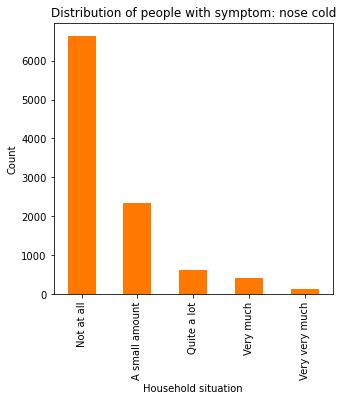

In [15]:
household = waves['Klacht_Neusverkoudheid'].value_counts().plot(kind='bar', figsize=(5,5), color=('#ff7900'))
values = ['Not at all','A small amount','Quite a lot', 'Very much','Very very much']
plt.xlabel('Household situation')
plt.ylabel('Count')
plt.title('Distribution of people with symptom: nose cold')

#vage omweg om de x tick labels te veranderen
ax = plt.gca()
ax.set_xticklabels(values, rotation=90)

In [ ]:
fig, axs = plt.subplots(3) 
fig.suptitle('Symptoms')
axs[0].plot

[Text(0, 0, 'Not at all'),
 Text(0, 0, 'A small amount'),
 Text(0, 0, 'Quite a lot'),
 Text(0, 0, 'Very much'),
 Text(0, 0, 'Very very much')]

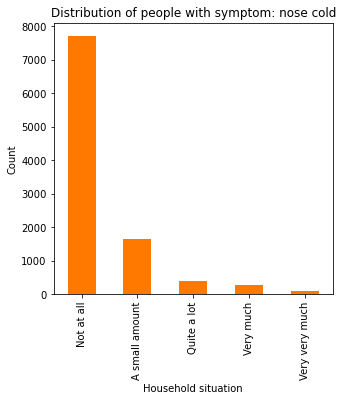

In [14]:
household = waves['Klacht_Keelpijn'].value_counts().plot(kind='bar', figsize=(5,5), color=('#ff7900'))
values = ['Not at all','A small amount','Quite a lot', 'Very much','Very very much']
plt.xlabel('Household situation')
plt.ylabel('Count')
plt.title('Distribution of people with symptom: nose cold')

#vage omweg om de x tick labels te veranderen
ax = plt.gca()
ax.set_xticklabels(values, rotation=90)

[Text(0, 0, 'Not at all'),
 Text(0, 0, 'A small amount'),
 Text(0, 0, 'Quite a lot'),
 Text(0, 0, 'Very much'),
 Text(0, 0, 'Very very much')]

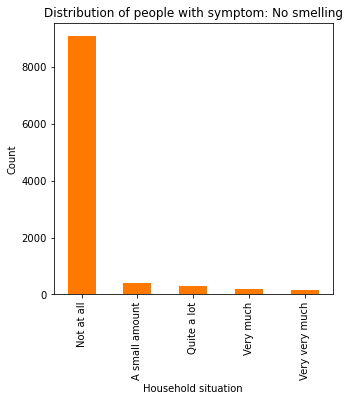

In [13]:
household = waves['Klacht_GeenReukSmaak'].value_counts().plot(kind='bar', figsize=(5,5), color=('#ff7900'))
values = ['Not at all','A small amount','Quite a lot', 'Very much','Very very much']
plt.xlabel('Household situation')
plt.ylabel('Count')
plt.title('Distribution of people with symptom: No smelling')

#vage omweg om de x tick labels te veranderen
ax = plt.gca()
ax.set_xticklabels(values, rotation=90)

[Text(0, 0, 'zeer strikt'),
 Text(0, 0, 'zo goed mogelijk'),
 Text(0, 0, 'een beetje'),
 Text(0, 0, 'niet echt'),
 Text(0, 0, 'helemaal niet'),
 Text(0, 0, 'niet van toepassing')]

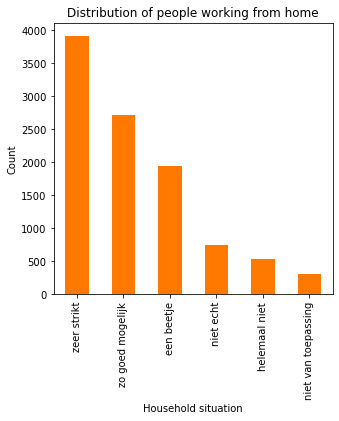

In [16]:
household = waves['RIVM_Thuiswerken'].value_counts().plot(kind='bar', figsize=(5,5), color=('#ff7900'))
values = ['zeer strikt','zo goed mogelijk','een beetje','niet echt','helemaal niet','niet van toepassing']
plt.xlabel('Household situation')
plt.ylabel('Count')
plt.title('Distribution of people working from home')

#vage omweg om de x tick labels te veranderen
ax = plt.gca()
ax.set_xticklabels(values, rotation=90)

Text(0.5, 1.0, 'Distribution of people with symptom: nose cold')

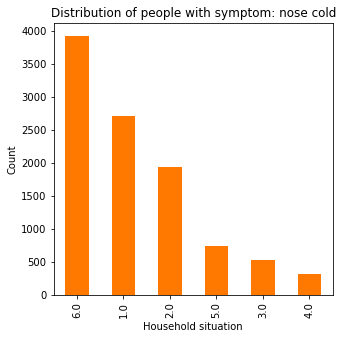

In [40]:
household = waves['RIVM_Thuiswerken'].sort_index(ascending=False).value_counts().plot(kind='bar', figsize=(5,5), color=('#ff7900'))
#values = ['zeer strikt','zo goed mogelijk','een beetje','niet echt','helemaal niet','niet van toepassing']
plt.xlabel('Household situation')
plt.ylabel('Count')
plt.title('Distribution of people with symptom: nose cold')

#vage omweg om de x tick labels te veranderen
#ax = plt.axes()
#ax.set_xticklabels(values, rotation=90)

## Amount of antibodies

In [41]:
waves['OD.CO'].head()

0    20.86
1    20.85
2    20.85
3    20.83
4    20.75
Name: OD.CO, dtype: float64

Text(0.5, 1.0, 'Distribution of antibodies | Positive class')

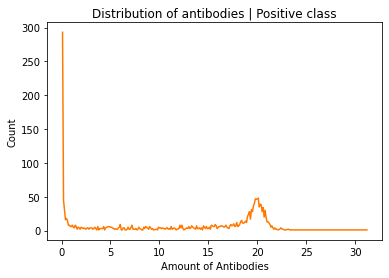

In [42]:
#make copy of dataset to not change original values
positives = waves.copy()

#only choose positives
positives = positives[positives['OD.CO'] > 0]

#round values to 1 decimal
decimals = 1    
positives['OD.CO'] = positives['OD.CO'].apply(lambda x: round(x, decimals))

#subset again when OD.CO is > 0
positives = positives[positives['OD.CO'] > 0]

#plot
positives['OD.CO'].value_counts().sort_index(ascending=True).plot(kind='line', color='#ff7900')
plt.xlabel('Amount of Antibodies')
plt.ylabel('Count')
plt.title('Distribution of antibodies | Positive class')

In [ ]:
dataset.hist(bins = 15, figsize = (15,15), xlabelsize = 0.1, ylabelsize = 0.1)
plt.show()

In [ ]:
sns.catplot(x='Geslacht',hue='Covid_result',kind='count',data=dataset)

In [ ]:
pd.crosstab(dataset['Huishouden'], dataset.Covid_result)


In [ ]:
pd.crosstab(dataset['CruciaalBeroep'], dataset.Covid_result)


In [ ]:
pd.crosstab(dataset['Klacht_Neusverkoudheid'], dataset.Covid_result)


In [ ]:
dataset.Covid_result.value_counts(normalize=True)


In [ ]:
colors = ['#8c4a5b','#ff7900']

sns.countplot('Covid_result', data=dataset, palette=colors)
plt.title('Covid Result', fontsize=14)

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(dataset.corr(),square=True,annot=True,cmap= 'twilight_shifted')